In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# This will load the cancer dataset
from sklearn import datasets
cancer = datasets.load_breast_cancer()
#This is the data we will use for this assignment
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
diabetes = pd.read_csv(url)
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [116]:
#This will seperate the data and the outcome we want.
X1 = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y1 = diabetes['Outcome']

#Standardization
STDScaler = StandardScaler()
X1scale = STDScaler.fit_transform(X1)
TrainX1, TestX1, TrainY1, TestY1 = train_test_split(X1scale, Y1, train_size = 0.8, test_size=0.2, random_state=100)

#Create and train the model for Diabetes
ModelD = LogisticRegression(random_state = 0)
ModelD.fit(TrainX1, TrainY1)

LogisticRegression(random_state=0)

In [117]:
def gradient_descent(TrainX, TrainY, TestX, TestY, theta, alpha, iterations):
    m = len(TrainY)  # Number of training examples
    TrainCostHist = np.zeros(iterations)
    TestCostHist = np.zeros(iterations)
    TrainAccuracyHist = np.zeros(iterations)
    TestAccuracyHist = np.zeros(iterations)

    for i in range(iterations):
        predictions = TrainX.dot(theta)
        errors = np.subtract(predictions, TrainY)
        SumDelta = (alpha / m) * TrainX.transpose().dot(errors)
        theta -= SumDelta
        TrainCostHist[i] = compute_cost(TrainX, TrainY, theta)
        TestCostHist[i] = compute_cost(TestX, TestY, theta)
        TrainAccuracyHist[i] = compute_accuracy(TrainX, TrainY, theta)
        TestAccuracyHist[i] = compute_accuracy(TestX, TestY, theta)

    return theta, TrainCostHist, TestCostHist, TrainAccuracyHist, TestAccuracyHist

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def compute_accuracy(X, y, theta):
    predictions = X.dot(theta)
    PredictedClasses = (predictions >= 0.5).astype(int) # Modified to assign 0 or 1 based on threshold
    y_true = y.astype(int)
    return accuracy_score(y_true, PredictedClasses)

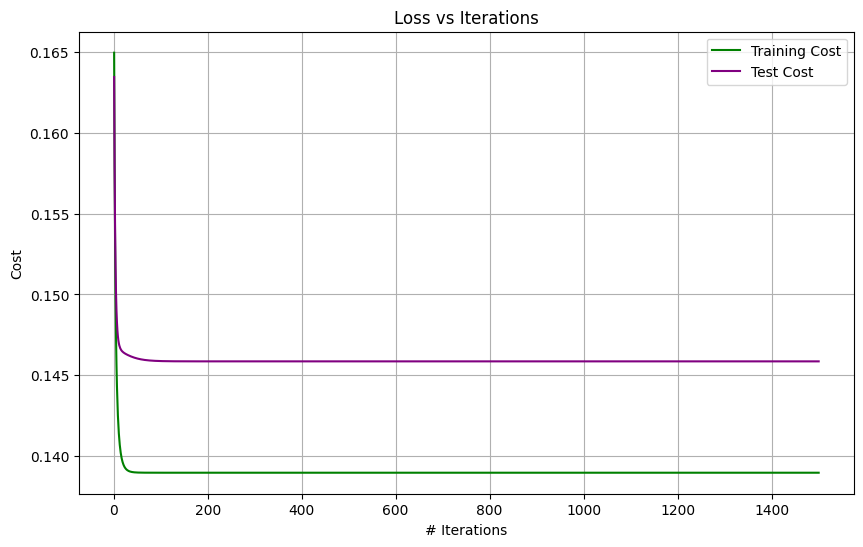

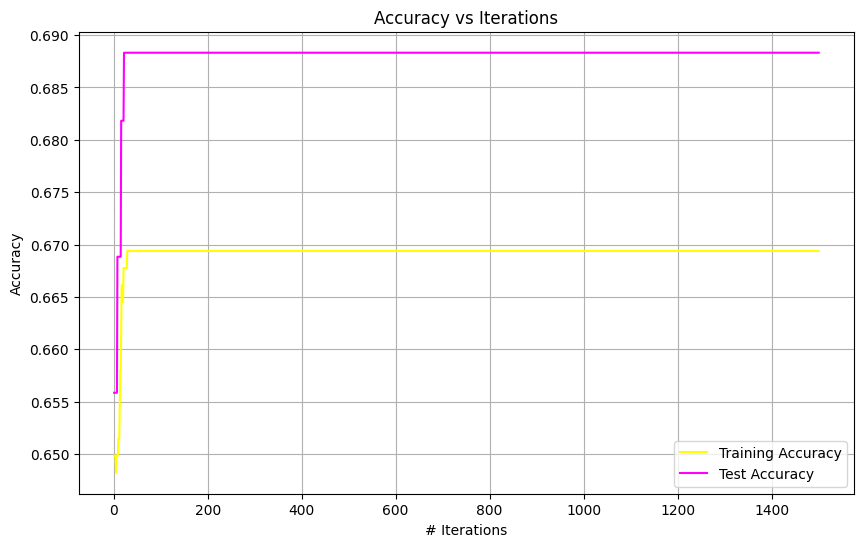

Results:

Accuracy: 0.7337662337662337
Precision: 0.6428571428571429
Recall: 0.5094339622641509
F1: 0.5684210526315789


In [118]:
theta = np.zeros(TrainX1.shape[1])
iterations = 1500
alpha = 0.1
theta, TrainCostHist, TestCostHist, TrainAccuracyHist, TestAccuracyHist = gradient_descent(TrainX1, TrainY1, TestX1, TestY1, theta, alpha, iterations)

#Data Plot for Problem 1
plt.plot(range(1, iterations +1), TrainCostHist, color = 'green', label = 'Training Cost')
plt.plot(range(1, iterations +1), TestCostHist, color = 'purple', label = 'Test Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Cost')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, iterations +1), TrainAccuracyHist, color = 'yellow', label = 'Training Accuracy')
plt.plot(range(1, iterations +1), TestAccuracyHist, color = 'magenta', label = 'Test Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

PredictY1 = ModelD.predict(TestX1)
print("Results:")
print("\nAccuracy:",metrics.accuracy_score(TestY1, PredictY1))
print("Precision:",metrics.precision_score(TestY1, PredictY1))
print("Recall:",metrics.recall_score(TestY1, PredictY1))
print("F1:",metrics.f1_score(TestY1, PredictY1))

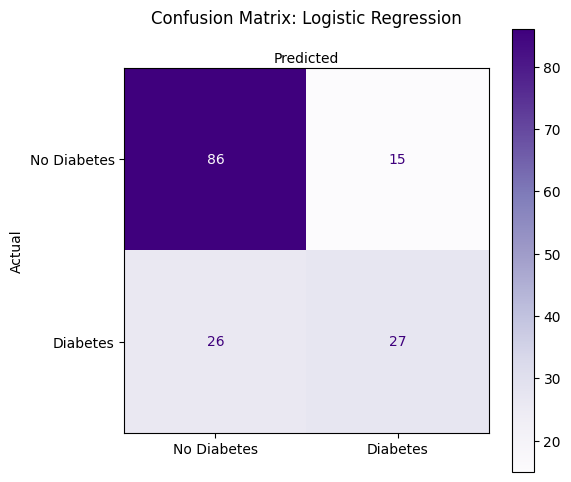

In [119]:
classification = ["No Diabetes", "Diabetes"]
cmatrix = confusion_matrix(TestY1, PredictY1)
fig, ax = plt.subplots(figsize=(6,5))
TickMarks = np.arange(len(classification))
plt.xticks(TickMarks, classification)
plt.yticks(TickMarks, classification)
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classification)
disp.plot(cmap='Purples', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix: Logistic Regression", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

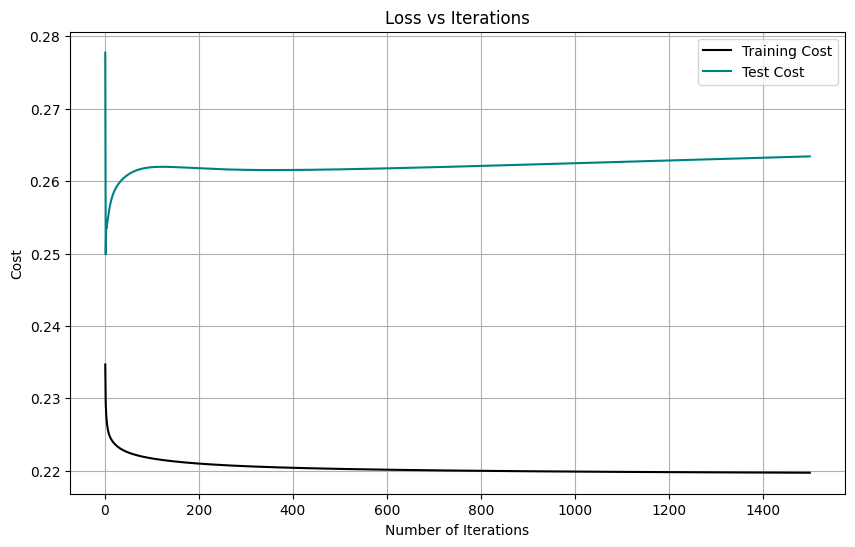

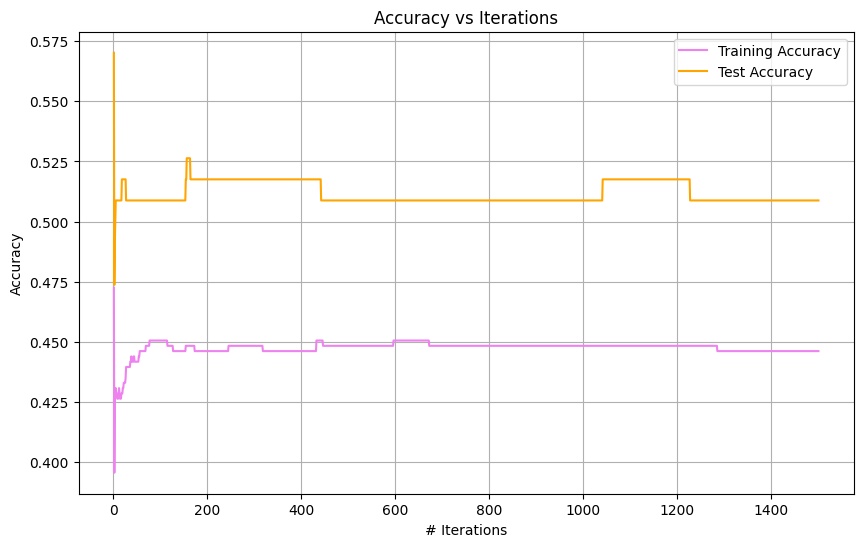

Results:

Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0
F1: 0.9774436090225563


In [120]:
#Problem 2a - Cancer Dataset
X2 = cancer.data
Y2 = cancer.target

STDScalerCancer = StandardScaler()
ScaledX2 = STDScalerCancer.fit_transform(X2)
TrainX2, TestX2, TrainY2, TestY2 = train_test_split(ScaledX2, Y2, train_size=0.8, test_size=0.2, random_state=100)

#Create and train the model for Cancer
Cmodel = LogisticRegression(random_state=0)
Cmodel.fit(TrainX2, TrainY2)

theta = np.zeros(TrainX2.shape[1])
iterations = 1500
alpha = 0.1
theta, TrainCostHist, TestCostHist, TrainAccuracyHist, TestAccuracyHist = gradient_descent(TrainX2, TrainY2, TestX2, TestY2, theta, alpha, iterations)

#Data Plot for 2a
plt.plot(range(1, iterations +1), TrainCostHist, color = 'black', label = 'Training Cost')
plt.plot(range(1, iterations +1), TestCostHist, color = 'teal', label = 'Test Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, iterations +1), TrainAccuracyHist, color = 'violet', label = 'Training Accuracy')
plt.plot(range(1, iterations +1), TestAccuracyHist, color = 'orange', label = 'Test Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

PredictY2 = Cmodel.predict(TestX2)
print("Results:")
print("\nAccuracy:",metrics.accuracy_score(TestY2, PredictY2))
print("Precision:",metrics.precision_score(TestY2, PredictY2))
print("Recall:",metrics.recall_score(TestY2, PredictY2))
print("F1:",metrics.f1_score(TestY2, PredictY2))

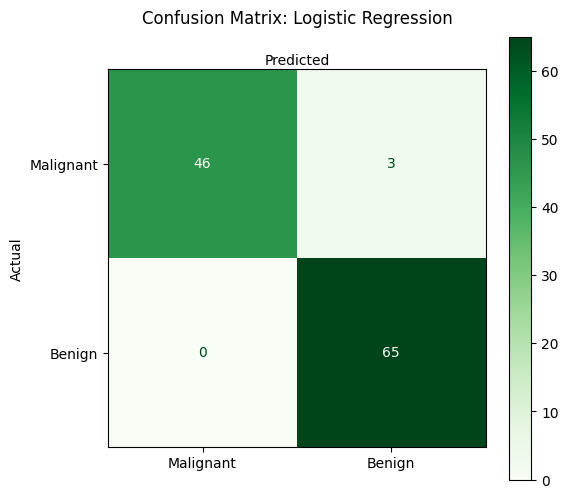

In [121]:
classification = ["Malignant", "Benign"]
cmatrix = confusion_matrix(TestY2, PredictY2)
fig, ax = plt.subplots(figsize=(6,5))
TickMarks = np.arange(len(classification))
plt.xticks(TickMarks, classification)
plt.yticks(TickMarks, classification)
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classification)
disp.plot(cmap='Greens', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix: Logistic Regression", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

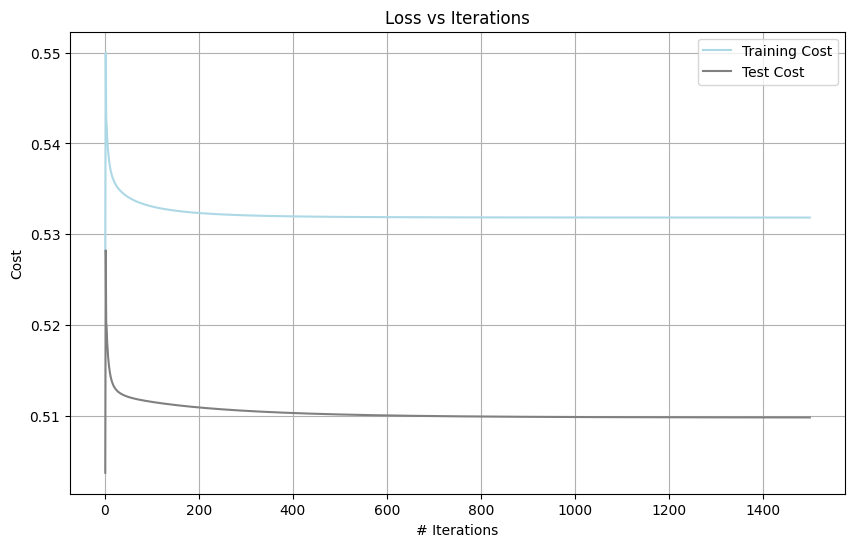

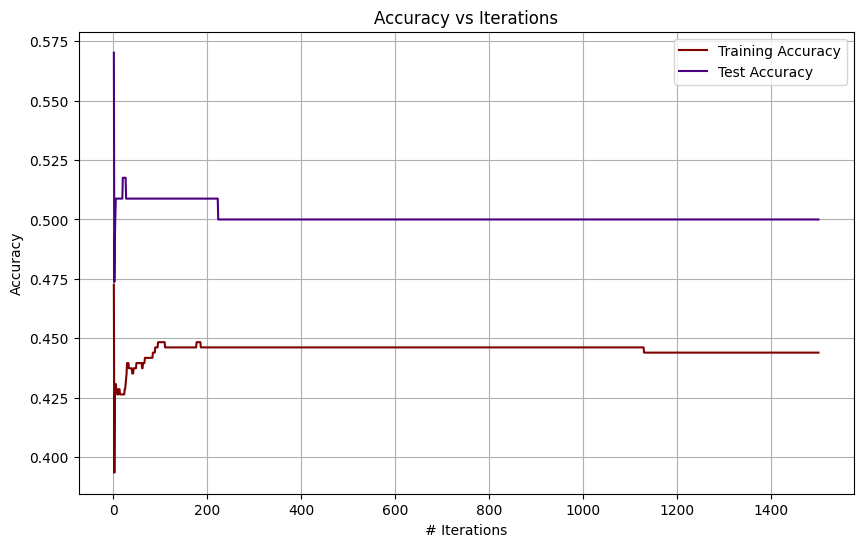

Results:

Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0
F1: 0.9774436090225563


In [127]:
#Problem 2b
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    errors = predictions - y
    sqrErrors = np.square(errors)
    J = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return J

def gradient_descent(TrainX, TrainY, TestX, TestY, theta, alpha, iterations, lam):
    m = len(TrainY)  # Number of training examples
    TrainCostHist = np.zeros(iterations)
    TestCostHist = np.zeros(iterations)
    TrainAccuracyHist = np.zeros(iterations)
    TestAccuracyHist = np.zeros(iterations)

    for i in range(iterations):
        predictions = TrainX.dot(theta)
        errors = np.subtract(predictions, TrainY)
        SumDelta = (alpha / m) * TrainX.transpose().dot(errors)
        SumDelta[1:] += (alpha * lam / m) * theta[1:]
        theta -= SumDelta
        TrainCostHist[i] = compute_cost(TrainX, TrainY, theta) + (lam/(2*m)) * np.sum(theta[1:]**2)
        TestCostHist[i] = compute_cost(TestX, TestY, theta) + (lam/(2*m)) * np.sum(theta[1:]**2)
        TrainAccuracyHist[i] = compute_accuracy(TrainX, TrainY, theta)
        TestAccuracyHist[i] = compute_accuracy(TestX, TestY, theta)

    return theta, TrainCostHist, TestCostHist, TrainAccuracyHist, TestAccuracyHist

#Standardization
STDScalerCancer = StandardScaler()
ScaledX2 = STDScalerCancer.fit_transform(X2)
TrainX2, TestX2, TrainY2, TestY2 = train_test_split(ScaledX2, Y2, train_size=0.8, test_size=0.2, random_state=100)

theta = np.zeros(TrainX2.shape[1])
iterations = 1500
alpha = 0.1
lam = 10
theta, TrainCostHist, TestCostHist, TrainAccuracyHist, TestAccuracyHist = gradient_descent(TrainX2, TrainY2, TestX2, TestY2, theta, alpha, iterations, lam)

#Data Plot for 2b
plt.plot(range(1, iterations +1), TrainCostHist, color = 'lightblue', label = 'Training Cost')
plt.plot(range(1, iterations +1), TestCostHist, color = 'grey', label = 'Test Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Cost')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, iterations +1), TrainAccuracyHist, color = 'maroon', label = 'Training Accuracy')
plt.plot(range(1, iterations +1), TestAccuracyHist, color = 'indigo', label = 'Test Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

PredictY2 = Cmodel.predict(TestX2)
print("Results:")
print("\nAccuracy:",metrics.accuracy_score(TestY2, PredictY2))
print("Precision:",metrics.precision_score(TestY2, PredictY2))
print("Recall:",metrics.recall_score(TestY2, PredictY2))
print("F1:",metrics.f1_score(TestY2, PredictY2))

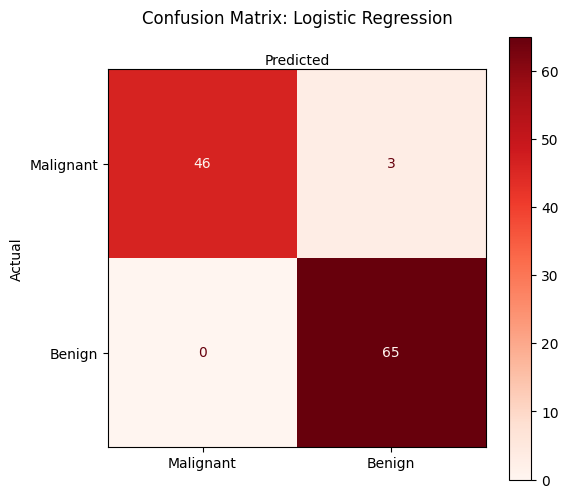

In [123]:
classification = ["Malignant", "Benign"]
cmatrix = confusion_matrix(TestY2, PredictY2)
fig, ax = plt.subplots(figsize=(6,5))
TickMarks = np.arange(len(classification))
plt.xticks(TickMarks, classification)
plt.yticks(TickMarks, classification)
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classification)
disp.plot(cmap='Reds', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix: Logistic Regression", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()